# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Jared Vitug
- Miguel Morales
- Phat Ly
- Kevin Mach

# Group Members IDs

- A92083122
- A########
- A14761299
- A12647584

# Research Question

Can we predict a current winning nba bracket from regular season matchup statistics collected over the last 10 years?
In a best-of-seven NBA playoff series, two teams will matchup against each other consecutively at least four times. This is unlike the regular season schedule in any way, where teams in the same division play at most four times but over the span of an 82 game season. However, we believe that from regular season statistics gathered from the eight current playoff matchups, over the span of the last ten years, we can predict an accurate playoff bracket for the current season’s playoffs. We will look at data such as each team’s winning percentage, number of assists, total offensive rebounds, number of roster changes, etc. to create a model that will tell us which team will win in a playoff series. We will take that model and use it to pick the winners of our bracket.


## Background and Prior Work

With NBA playoffs in full effect, we knew we wanted to research something relative to basketball that was also fun.  We all know sports are near impossible to predict and basketball is no exception - or is it? We began to wonder what if, given a playoff bracket, we could predict each round of the playoffs and thereby figure out who would win the championship.

Each of us watches basketball and knows a few plays can define a game.  Injuries happen, human error occurs, and upsets take place.  However, in the world of sports betting, none of this matters - only numbers matter.  That’s why we decided to find the best combination of regular season matchup stats (between two teams pitted against each other in the playoffs) that can successfully predict a series outcome.

When it comes to the individual statistics, we know that the team which wins the turnover battle usually comes out on top, as does the team with more rebounds and shooting percentage.  However, with all the different play-styles in today’s NBA (iso-ball, backcourt dominance, frontcourt dominance) we want to find out if there are other team stats that can help us predict winners, such as three pointers taken, team fouls, timeouts used, etc.


https://towardsdatascience.com/predicting-nba-winning-percentage-in-upcoming-season-using-linear-regression-f8687d9c0418
https://github.com/COGS108/FinalProjects-Wi18/blob/master/001-FinalProject.ipynb
The above link is to a similar project where someone took 40 years of basketball data from basketball-reference.com and trained the data to predict NBA winning percentage.  The article says that “average age of the players, margin of victory, number of points scored, number of returning players, and number of blocks” were some of the statistics included, which gives us some idea as to which statistics to pull.   The study’s analysis discusses how wrong the model was in over-predicting winning seasons and underpredicting losing seasons with the reason being injuries, trades, and retirements - all things which are hard to predict and difficult to assess from a mathematical perspective.

# Hypothesis


We hypothesize that it is possible to predict the winner of a 7-game playoff series between two NBA teams by analyzing their regular season matchup statistics.
By narrowing our data to historical team matchups, we can examine specific factors that may be pertinent in explaining why one team may have the competitive edge. There are many accessible statistics for every NBA game, and this data can be utilized to determine if one franchise may have a playstyle better suited for a particular opponent. Features such as the record of the matchups (giving more weight to recent wins), number of possessions, offensive rebounds, total assists, turnovers, etc. are all telling of how advantageous a team is over the other. Although teams change over time due to player, coach, and management contracts, we will attempt to take those conditions into account by feature engineering, as winning teams tend to have less structure change. Additionally, we can favor more recent data as it will be more telling of the current matchup. Therefore, with a catalog of in depth matchup statistics, we hypothesize that we can create a strong dataset for our model to predict a correct playoff bracket.


# Dataset(s)

Dataset Name: NBA Advanced Stat Dataset Source : https://www.basketball-reference.com/ 
Dataset Sample : https://www.basketball-reference.com/teams/MIL/2019/gamelog/?fbclid=IwAR3BFW5ivLDuQE5NRVkPbHnEIlwe-CCCsoeo8RxOxmcPHssP0_mzfJgsVr8
Number of datasets planned : 160 totals- 10 per teams.

Dataset Explanation: Originally we were planning on using stats.nba.com but we found out the website does not make their data available for webscrapping, so we changed to basketball-reference.com which we could do web-craping. The dataset they have is in form of a table where columns are the game stats and rows are the game date and opponent. Each dataset represents one of the 16 teams at a particular year. The dataset includes every match up in that season as well as the scores, shooting percentages...etc. The benefit of using this website is that they have past and current regular seasons data of every teams in the 2019 playoff, which allows us to get the stats we need for our project. The downside is that the website separates the data into each year and team. However, we found that by manipulating the url- we could get to every dataset by changing the year and the team acronym.

# Setup

In [1]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import bs4
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, recall_score, f1_score

In [2]:
#example URL
# https://www.basketball-reference.com/teams/MIL/2019/gamelog/?fbclid=IwAR3BFW5ivLDuQE5NRVkPbHnEIlwe-CCCsoeo8RxOxmcPHssP0_mzfJgsVr8

year_array = ["2010", "2011", "2012", "2013", "2014", "2015", 
              "2016", "2017", "2018", "2019"]
team_array = ["GSW", "HOU", "POR", "DEN", "LAC", "UTA", "OKC", 
             "SAS", "MIL", "BOS", "PHI", "TOR", "DET", "IND", "ORL", "BRK"]

def create_url(year_array, team_array):
    #variables for appending the URLs
    begLink = "https://www.basketball-reference.com/teams/"
    endLink = "/gamelog/?fbclid=IwAR3BFW5ivLDuQE5NRVkPbHnEIlwe-CCCsoeo8RxOxmcPHssP0_mzfJgsVr8"
    #array to store the url's
    url_list = []
    #loop through team_array 
    for i in team_array:
        #loop through each year in 
        for j in year_array:
            team_name = i
            # if the team is Brooklyn and the year is 2010-2012, team name
            # is New Jersey Nets
            if(i == "BRK" and (j == "2010" or j == "2011" or j == "2012")):
                team_name = "NJN"    
            temp_url = begLink + team_name + "/" + j + endLink
            #print(temp_url)
            url_list = np.append(url_list, temp_url)
    #print(url_list)
    return url_list

            
url_list = create_url(year_array, team_array)


In [3]:
url_list

array(['https://www.basketball-reference.com/teams/GSW/2010/gamelog/?fbclid=IwAR3BFW5ivLDuQE5NRVkPbHnEIlwe-CCCsoeo8RxOxmcPHssP0_mzfJgsVr8',
       'https://www.basketball-reference.com/teams/GSW/2011/gamelog/?fbclid=IwAR3BFW5ivLDuQE5NRVkPbHnEIlwe-CCCsoeo8RxOxmcPHssP0_mzfJgsVr8',
       'https://www.basketball-reference.com/teams/GSW/2012/gamelog/?fbclid=IwAR3BFW5ivLDuQE5NRVkPbHnEIlwe-CCCsoeo8RxOxmcPHssP0_mzfJgsVr8',
       'https://www.basketball-reference.com/teams/GSW/2013/gamelog/?fbclid=IwAR3BFW5ivLDuQE5NRVkPbHnEIlwe-CCCsoeo8RxOxmcPHssP0_mzfJgsVr8',
       'https://www.basketball-reference.com/teams/GSW/2014/gamelog/?fbclid=IwAR3BFW5ivLDuQE5NRVkPbHnEIlwe-CCCsoeo8RxOxmcPHssP0_mzfJgsVr8',
       'https://www.basketball-reference.com/teams/GSW/2015/gamelog/?fbclid=IwAR3BFW5ivLDuQE5NRVkPbHnEIlwe-CCCsoeo8RxOxmcPHssP0_mzfJgsVr8',
       'https://www.basketball-reference.com/teams/GSW/2016/gamelog/?fbclid=IwAR3BFW5ivLDuQE5NRVkPbHnEIlwe-CCCsoeo8RxOxmcPHssP0_mzfJgsVr8',
       'https://www.

In [4]:
#this code creates a list of dataframes corresponding to the url's in url_list

#list to store individual dataframes before combining
df_list = []
#i = 0
for url in url_list:
    #print(i)
    req = requests.get(url)
    soup = BeautifulSoup(req.content, 'html.parser') #get contents of webpage
    nbatables = soup.findAll("table", 'row_summable sortable stats_table') #get tables
    tbl1 = nbatables[0]
    new_tbl1 = pd.DataFrame(columns=range(0,40), index = range(0,91))
    
    #get the column names for our first table
    ind=0
    cols_list = []
    for header in tbl1.find_all('tr'): #specify HTML tags
        header_name = header.find_all('th') #tag containing column names
        for head in header_name:
            cols_list.append(head.get_text()) #get the text from between the tags
    
    #fill in contents for each table
    row_marker = -1
    for row in tbl1.find_all('tr'):
        column_marker = 0
        columns = row.find_all('td') # different tag than above for table contents
        for column in columns:
            new_tbl1.iat[row_marker,column_marker] = column.get_text()
            column_marker += 1
        row_marker += 1
    df_list.append(new_tbl1)
    #i = i + 1

In [5]:
def create_team_df(team, df_list):
    #team_df = df_list[0]
    if(team == "GSW"):
        i = 0
        team_df = df_list[i];
        while i < 9:
            team_df = team_df.append(df_list[i+1])
            i = i + 1
    if(team == "HOU"):
        i = 10
        team_df = df_list[i];
        while i < 19:
            team_df = team_df.append(df_list[i+1])
            i = i + 1
    if(team == "POR"):
        i = 20
        team_df = df_list[i];
        while i < 29:
            team_df = team_df.append(df_list[i+1])
            i = i + 1
    if(team == "DEN"):
        i = 30
        team_df = df_list[i];
        while i < 39:
            team_df = team_df.append(df_list[i+1])
            i = i + 1
    if(team == "LAC"):
        i = 40
        team_df = df_list[i];
        while i < 49:
            team_df = team_df.append(df_list[i+1])
            i = i + 1
    if(team == "UTA"):
        i = 50
        team_df = df_list[i];
        while i < 59:
            team_df = team_df.append(df_list[i+1])
            i = i + 1
    if(team == "OKC"):
        i = 60
        team_df = df_list[i];
        while i < 69:
            team_df = team_df.append(df_list[i+1])
            i = i + 1
    if(team == "SAS"):
        i = 70
        team_df = df_list[i];
        while i < 79:
            team_df = team_df.append(df_list[i+1])
            i = i + 1
    if(team == "MIL"):
        i = 80
        team_df = df_list[i];
        while i < 89:
            team_df = team_df.append(df_list[i+1])
            i = i + 1
    if(team == "BOS"):
        i = 90
        team_df = df_list[i];
        while i < 99:
            team_df = team_df.append(df_list[i+1])
            i = i + 1
    if(team == "PHI"):
        i = 100
        team_df = df_list[i];
        while i < 109:
            team_df = team_df.append(df_list[i+1])
            i = i + 1
    if(team == "TOR"):
        i = 110
        team_df = df_list[i];
        while i < 119:
            team_df = team_df.append(df_list[i+1])
            i = i + 1
    if(team == "DET"):
        i = 120
        team_df = df_list[i];
        while i < 129:
            team_df = team_df.append(df_list[i+1])
            i = i + 1
    if(team == "IND"):
        i = 130
        team_df = df_list[i];
        while i < 139:
            team_df = team_df.append(df_list[i+1])
            i = i + 1
    if(team == "ORL"):
        i = 140
        team_df = df_list[i];
        while i < 149:
            team_df = team_df.append(df_list[i+1])
            i = i + 1
    if(team == "BRK"):
        i = 150
        team_df = df_list[i];
        while i < 159:
            team_df = team_df.append(df_list[i+1])
            i = i + 1
    #NOTE: renamed opponent points to OppP
    team_df.columns = [
 'G',
 'Date',
 'Home',
 'Opp',
 'W/L',
 'Tm',
 'OppP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 '\xa0',
 'oppFG',
 'oppFGA',
 'oppFG%',
 'opp3P',
 'opp3PA',
 'opp3P%',
 'oppFT',
 'oppFTA',
 'oppFT%',
 'oppORB',
 'oppTRB',
 'oppAST',
 'oppSTL',
 'oppBLK',
 'oppTOV',
 'oppPF']
    return team_df

In [6]:
GSW_df = create_team_df("GSW", df_list)
HOU_df = create_team_df("HOU", df_list)
POR_df = create_team_df("POR", df_list)
DEN_df = create_team_df("DEN", df_list)
LAC_df = create_team_df("LAC", df_list)
UTA_df = create_team_df("UTA", df_list)
OKC_df = create_team_df("OKC", df_list)
SAS_df = create_team_df("SAS", df_list)
MIL_df = create_team_df("MIL", df_list)
BOS_df = create_team_df("BOS", df_list)
PHI_df = create_team_df("PHI", df_list)
TOR_df = create_team_df("TOR", df_list)
DET_df = create_team_df("DET", df_list)
IND_df = create_team_df("IND", df_list)
ORL_df = create_team_df("ORL", df_list)
BRK_df = create_team_df("BRK", df_list)

In [7]:
#Create a team dictionary to hold all of the dataframes. Key = team name, Value = team dataframe
teams_dict = {
    "GSW" : GSW_df,
    "HOU" : HOU_df,
    "POR" : POR_df,
    "DEN" : DEN_df,
    "LAC" : LAC_df,
    "UTA" : UTA_df,
    "OKC" : OKC_df,
    "SAS" : SAS_df,
    "MIL" : MIL_df,
    "BOS" : BOS_df,
    "PHI" : PHI_df,
    "TOR" : TOR_df,
    "DET" : DET_df,
    "IND" : IND_df,
    "ORL" : ORL_df,
    "BRK" : BRK_df
 } 

In [8]:
# Add the team as a column for each dataframe
for team, team_df in teams_dict.items():
    name = []
    # Creating a list filled with team's acronym
    for x in range(len(team_df.index)):
        name.append(team)
    team_df['Team'] = name

# Data Cleaning

Our end goal for the data cleaning would be that the resulting dataframes would have no nan values. In addition, some columns do not have any data that we think is important, such as the game #... etc, and we plan on removing those. Lastly, we want to transform some columns for easier reading and computing. In particular, the data set contains all of the game data of a particular team from year 2009 to 2019. However, a regular season will overlapped between two years, thus we want to change the date so that the year will be when the regular season ends. For the W/L record, the current data is displaying as a string "W" and "L" for win and loss. To make it easier for us to compute like the win-rate percent, we want the data to be in term of 1 and 0. The tools we will be using would be pandas library functions like dropna() as well as some of our own functions to transform the data. Lastly, we will also change the type of each columns from objects to float or int as this will allow us to use the data.

In [63]:
#This array contains the month when the season begins
firstHalf   = ['10','11','12']
#This array contains the columns of the int type
int_type = ['Tm', 'OppP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 
'oppFG', 'oppFGA', 'opp3P', 'opp3PA', 'oppFT', 'oppFTA', 'oppORB', 'oppTRB', 'oppAST', 'oppSTL', 'oppBLK', 'oppTOV','oppPF' ]
#This array contains the columns of the float type
float_type = ['FG%', '3P%','FT%', 'oppFG%', 'opp3P%', 'oppFT%']

In [10]:
#This function allows us to filter out the date and month of the game. It is also easier to tell which year the data belongs to 
def standardize_year(input_year):
    year  = str(input_year)[:4]
    month = str(input_year)[5:7]
    if month in firstHalf:
        return int(year) + 1
    else:
        return int(year)

#This function allows us to transform the W/L to computable data. W => 1, L => 0    
def standardize_score(input_score):
    if input_score == "W":
        return int(1)
    else:
        return int(0)
    
def standardize_home(input_home):
    if input_home == "@":
        return int(1)
    else:
        return int(0)

In [11]:
#Cleaning the data
for w in team_array:
    #Getting dataframe of the current team
    currentTeam_df = teams_dict[w]      
    #Drop rows with nan values
    currentTeam_df = currentTeam_df.dropna() 
    #Drop columns that have unneccessary data 
    currentTeam_df = currentTeam_df.drop(labels = ['\xa0', 'G'], axis=1)            
    #Drop rows with teams that are not in the current 2019 playoff
    currentTeam_df = currentTeam_df[currentTeam_df['Opp'].isin(team_array)]
    #Filter and transform the "Date" column
    currentTeam_df['Date'] = currentTeam_df['Date'].apply(standardize_year)
    #Transform the "W/L" column 
    currentTeam_df['W/L']  = currentTeam_df['W/L'].apply(standardize_score)
    currentTeam_df['Home'] = currentTeam_df['Home'].apply(standardize_home)
    for label in int_type:
        currentTeam_df[label] = currentTeam_df[label].astype('int')
    for other_label in float_type:
        currentTeam_df[other_label] = currentTeam_df[other_label].astype('float')
    #Apply the modification
    teams_dict[w]  = currentTeam_df

# Data Analysis & Results

Before we start analyzing and computing the data, creating some visualizations will help us understand the data better. In particular, we hypothesize of some particular data that we think has an impact on the game. In our model, we will use more, but for the visualization, we will take a look at three main stats. Those stats are the 3-point goals, average shooting percentage, and the number of turnovers of each team. First, we will take a look at the average shooting percentage over the past 10 years.

In [69]:
#Extracting the data
data = []
for t in team_array:
    team = []
    for y in year_array:
        stat = [0, 0]
        year = int(y)
        score_data = teams_dict[t][teams_dict[t]['Date'] == year]
        score = round(score_data['FG%'].mean(), 3)
        team.append((year, score))
    data.append(team)

In [70]:
def graph(teams):
    year = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
    fig = plt.figure(figsize = (10,5))
    for t in teams:
        i = team_array.index(t)
        team_data = data[i]
        team_name = team_array[i]
        temp_df = pd.DataFrame(team_data)
        temp_df.columns = ['year', 'score']
        plt.plot(temp_df['year'], temp_df['score'], label = team_name)
    plt.xlim(2009, 2020)
    plt.xticks(year)
    plt.xlabel('Year')
    plt.ylabel('Average Shooting Percentage')
    plt.title('Playoff Teams Average Shooting Percentage Over the Years')
    plt.legend()
    plt.show()

Since there are 16 teams, the graph will look really messy and hard to read. Thus, we decide to write a function that take in the list of teams that we want to display. This not only allows us to break down the graph into group of teams but also let us compare specific pair of teams. For example, let's take a look at 4 group of 4 teams.

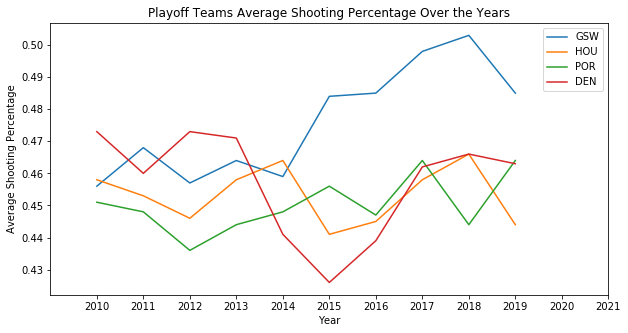

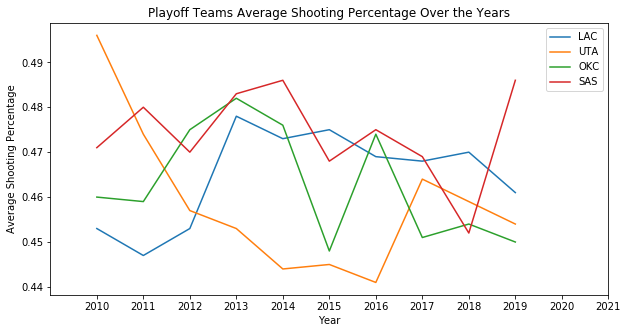

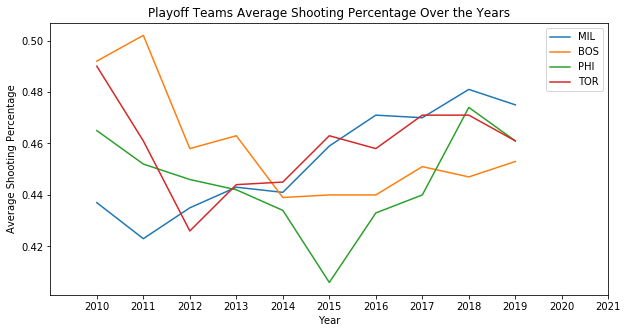

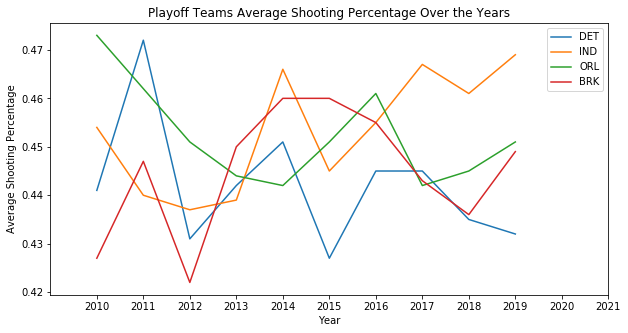

In [71]:
graph(team_array[:4])
graph(team_array[4:8])
graph(team_array[8:12])
graph(team_array[12:])

From these graphs, we see very little trends. The playoff teams average shooting percentage ranges from 40% to 50%. Teams like GSW, IND, MIL have an upward trends in their shooting percentage, while other teams like ORL and DET have a downward trend. There is inconsistency with the trend which we think is reasonable given that some of these teams do not attend previous year playoffs. Some teams improve over the previous year (2018) while some teams show a little dip.

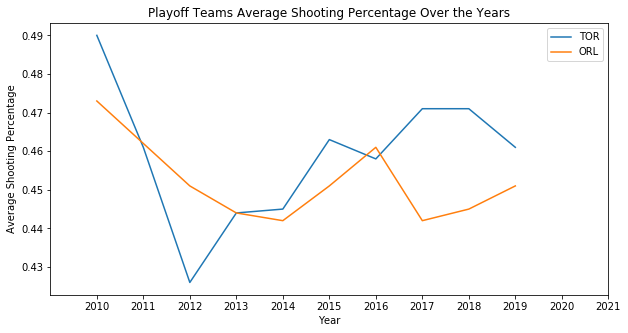

In [72]:
teams = ['TOR', 'ORL']
graph(teams)

Looking at this graph, we can see that average shooting percentages of the Raptor is slightly higher than Orlean Magic. This however, is not enough to conclude that Raptor would win against Orlean Magic and other stats can't be ignored. In our model, we may give an edge towards the Raptor in its matchup with the Orlean Magic based on this stat.

Another stat that we might take a look at is the number of turnovers. In a basketball, a mistake by a player that leads to a turnover can allow the opponent team to score more points. An assumption that we might make is that in a matchup, the winning team would have the less turnover compare to their opponent. Let's take a look at the recent year 2019 and see the average turnovers these teams have in their regular season. 

In [16]:
to_data = []
three_pointShots = []
for w in team_array:
    team_df = teams_dict[w]
    team_df = team_df[team_df['Date'] == 2019]
    team_3point   = round(team_df['3P'].mean(),2)
    team_turnOver = team_df['TOV'].sum()
    opp_turnOver  = team_df['oppTOV'].sum()
    turnOverNum   = team_turnOver - opp_turnOver
    to_data.append((w, turnOverNum ))
    three_pointShots.append((w, team_3point))

Text(0, 0.5, 'Number of Turnovers Against Opponent')

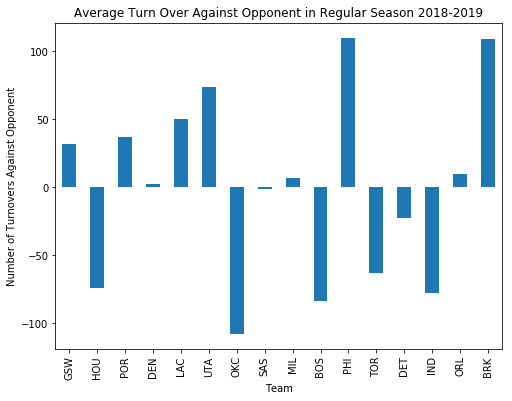

In [17]:
temp_df = pd.DataFrame(to_data)
temp_df.columns = ['Team', 'Total Turnovers Against Opponent in Regular Season 2018-2019']
temp_df.set_index(keys = 'Team', inplace = True)
ax = temp_df.plot(kind = 'bar', figsize = (8, 6), legend = False, title = 'Average Turn Over Against Opponent in Regular Season 2018-2019')
ax.set_ylabel('Number of Turnovers Against Opponent')

From this graph, we can see that some teams are pretty great at not losing possession or steal from the other team. Others are not so great at it. At the same time, the difference between teams are quite noticable. Perharp, we can use this as one of the feature in determing the outcome.  

Text(0, 0.5, 'Number of 3 Point Goals')

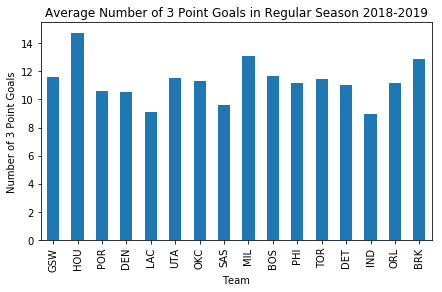

In [18]:
tpg_df = pd.DataFrame(three_pointShots)
tpg_df.columns = ['Team', '3 Point Goals']
tpg_df.set_index(keys = 'Team', inplace = True)
tpg = tpg_df.plot(kind = 'bar', title = 'Average Number of 3 Point Goals in Regular Season 2018-2019', legend = False, figsize = (7, 4))
tpg.set_ylabel('Number of 3 Point Goals')

Lastly, for the three-point goals, the playoff teams seem to be average around 10-11 goals. HOU stands out among the 16 teams at the average of 15 goals while other teams seem to be pretty similar to one another.

First we will compute the average game statistics for every team during the 2019 season against their respective opponent in the playoffs, as this will be used for the input for our model i.e. our "testing data". We will then concatenate these statistics to the original dataframe and begin feature engineering. Many of these features will consist of binary variables such as higherFG%, higherTOV, higher3P%, higherFT%, higherFGA, higherFTA, higher3PA, higherORB, higherTRB, higherBLK, higherSTL, higherAST, and higherPF. The label we wish to predict is whether or not they win the matchup.     

In [19]:
# Concatenating all the teams dataframes into one dataframe
df_all = pd.DataFrame()
for team_df in teams_dict.values():
    df_all = pd.concat([df_all, team_df], axis=0)

In [20]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6467 entries, 1 to 89
Data columns (total 39 columns):
Date      6467 non-null int64
Home      6467 non-null int64
Opp       6467 non-null object
W/L       6467 non-null int64
Tm        6467 non-null int32
OppP      6467 non-null int32
FG        6467 non-null int32
FGA       6467 non-null int32
FG%       6467 non-null float64
3P        6467 non-null int32
3PA       6467 non-null int32
3P%       6467 non-null float64
FT        6467 non-null int32
FTA       6467 non-null int32
FT%       6467 non-null float64
ORB       6467 non-null int32
TRB       6467 non-null int32
AST       6467 non-null int32
STL       6467 non-null int32
BLK       6467 non-null int32
TOV       6467 non-null int32
PF        6467 non-null int32
oppFG     6467 non-null int32
oppFGA    6467 non-null int32
oppFG%    6467 non-null float64
opp3P     6467 non-null int32
opp3PA    6467 non-null int32
opp3P%    6467 non-null float64
oppFT     6467 non-null int32
oppFTA    6467

In [21]:
# This function will calculate average matchup statistics between two teams in the 2019 season and append it to the overall dataframe
home_seeds = ["GSW", "DEN", "POR", "HOU", "MIL", "TOR", "PHI", "BOS"]

def average_stats_2019(team_name, df_team, df_total, opp):
    df_2019 = df_team[(df_team['Date'] == 2019) & (df_team['Opp'] == opp)]
    avgs = df_2019.mean(axis=0)
    avgs_df = avgs.to_frame().transpose()
    # Removing the 'W/L' column as that is what we will need to predict
    avgs_df.drop(labels = 'W/L', axis = 1, inplace = True)
    # Adding back the team and opp columns
    avgs_df['Team'] = team_name
    avgs_df['Opp'] = opp
    if (team_name in home_seeds):
        avgs_df['Home'] = 1
    else:
        avgs_df['Home'] = 0
    return pd.concat([df_total, avgs_df], axis = 0)

In [22]:
# Creating the average statistics between playoff matchups
for team, df_team in teams_dict.items():
    if (team == "GSW"):
        opponent = "LAC"
    elif (team == "HOU"):
        opponent = "UTA"
    elif (team == "PHI"):
        opponent = "BRK"
    elif (team == "UTA"):
        opponent = "HOU"
    elif (team == "MIL"):
        opponent = "DET"
    elif (team == "TOR"):
        opponent = "ORL"
    elif (team == "DET"):
        opponent = "MIL"
    elif (team == "BOS"):
        opponent = "IND"
    elif (team == "POR"):
        opponent = "OKC"
    elif (team == "ORL"):
        opponent = "TOR"
    elif (team == "LAC"):
        opponent = "GSW"
    elif (team == "IND"):
        opponent = "BOS"
    elif (team == "OKC"):
        opponent = "POR"
    elif (team == "BRK"):
        opponent = "PHI"
    elif (team == "DEN"):
        opponent = "SAS"
    elif (team == "SAS"):
        opponent = "DEN"
    else:
        continue        
    print(team + ' vs ' + opponent)
    new_df = average_stats_2019(team, df_team, df_all, opponent)
    df_all = new_df

GSW vs LAC
HOU vs UTA
POR vs OKC
DEN vs SAS
LAC vs GSW
UTA vs HOU
OKC vs POR
SAS vs DEN
MIL vs DET
BOS vs IND
PHI vs BRK
TOR vs ORL
DET vs MIL
IND vs BOS
ORL vs TOR
BRK vs PHI


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [23]:
# Checking out the data, delete later
df_all['Team'].tail(16)

0    GSW
0    HOU
0    POR
0    DEN
0    LAC
0    UTA
0    OKC
0    SAS
0    MIL
0    BOS
0    PHI
0    TOR
0    DET
0    IND
0    ORL
0    BRK
Name: Team, dtype: object

In [24]:
# Resetting index
df_all = df_all.reset_index()
df_all.drop(labels = 'index', axis = 1, inplace = True)

In [25]:
df_all.columns

Index(['3P', '3P%', '3PA', 'AST', 'BLK', 'Date', 'FG', 'FG%', 'FGA', 'FT',
       'FT%', 'FTA', 'Home', 'ORB', 'Opp', 'OppP', 'PF', 'STL', 'TOV', 'TRB',
       'Team', 'Tm', 'W/L', 'opp3P', 'opp3P%', 'opp3PA', 'oppAST', 'oppBLK',
       'oppFG', 'oppFG%', 'oppFGA', 'oppFT', 'oppFT%', 'oppFTA', 'oppORB',
       'oppPF', 'oppSTL', 'oppTOV', 'oppTRB'],
      dtype='object')

### Feature Engineering

In [26]:
# higherFG%, higherTOV, higher3P%, higherFT%, higherFGA, higherFTA, higher3PA, higherORB, higherTRB, higherBLK, higherSTL 
# higherAST, higherPF, higherFGM, higher3PM, higherFTM, homecourt
train_data = pd.DataFrame()
train_data['W'] = df_all['W/L']
train_data['Team'] = df_all['Team']
train_data['Opp'] = df_all['Opp']
train_data['Home'] = df_all['Home']
train_data['higherFG%'] = (df_all['FG%'] - df_all['oppFG%']).apply(lambda x: 1 if x > 0 else 0)
train_data['higherTOV'] = (df_all['TOV'] - df_all['oppTOV']).apply(lambda x: 0 if x < 0 else 1)
train_data['higher3P%'] = (df_all['3P%'] - df_all['opp3P%']).apply(lambda x: 1 if x > 0 else 0)
train_data['higherFT%'] = (df_all['FT%'] - df_all['oppFT%']).apply(lambda x: 1 if x > 0 else 0)
train_data['higherFGA'] = (df_all['FGA'] - df_all['oppFGA']).apply(lambda x: 1 if x > 0 else 0)
train_data['higherFTA'] = (df_all['FTA'] - df_all['oppFTA']).apply(lambda x: 1 if x > 0 else 0)
train_data['higher3PA'] = (df_all['3PA'] - df_all['opp3PA']).apply(lambda x: 1 if x > 0 else 0)
train_data['higherORB'] = (df_all['ORB'] - df_all['oppORB']).apply(lambda x: 1 if x > 0 else 0)
train_data['higherTRB'] = (df_all['TRB'] - df_all['oppTRB']).apply(lambda x: 1 if x > 0 else 0)
train_data['higherBLK'] = (df_all['BLK'] - df_all['oppBLK']).apply(lambda x: 1 if x > 0 else 0)
train_data['higherSTL'] = (df_all['STL'] - df_all['oppSTL']).apply(lambda x: 1 if x > 0 else 0)
train_data['higherAST'] = (df_all['AST'] - df_all['oppAST']).apply(lambda x: 1 if x > 0 else 0)
train_data['higherPF'] = (df_all['PF'] - df_all['oppPF']).apply(lambda x: 0 if x > 0 else 1)
train_data['higherFGM'] = (df_all['FG'] - df_all['oppFG']).apply(lambda x: 1 if x > 0 else 0)
train_data['higher3PM'] = (df_all['3P'] - df_all['opp3P']).apply(lambda x: 1 if x > 0 else 0)
train_data['higherFTM'] = (df_all['FT'] - df_all['oppFT']).apply(lambda x: 1 if x > 0 else 0)

In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6483 entries, 0 to 6482
Data columns (total 20 columns):
W            6467 non-null float64
Team         6483 non-null object
Opp          6483 non-null object
Home         6483 non-null int64
higherFG%    6483 non-null int64
higherTOV    6483 non-null int64
higher3P%    6483 non-null int64
higherFT%    6483 non-null int64
higherFGA    6483 non-null int64
higherFTA    6483 non-null int64
higher3PA    6483 non-null int64
higherORB    6483 non-null int64
higherTRB    6483 non-null int64
higherBLK    6483 non-null int64
higherSTL    6483 non-null int64
higherAST    6483 non-null int64
higherPF     6483 non-null int64
higherFGM    6483 non-null int64
higher3PM    6483 non-null int64
higherFTM    6483 non-null int64
dtypes: float64(1), int64(17), object(2)
memory usage: 1013.0+ KB


In [28]:
train_data.tail(16)

,W,Team,Opp,Home,higherFG%,higherTOV,higher3P%,higherFT%,higherFGA,higherFTA,higher3PA,higherORB,higherTRB,higherBLK,higherSTL,higherAST,higherPF,higherFGM,higher3PM,higherFTM
6467,NaN,GSW,LAC,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0
6468,NaN,HOU,UTA,1,0,0,1,1,1,0,1,0,0,1,1,0,0,0,1,0
6469,NaN,POR,OKC,1,0,1,0,1,1,1,1,1,1,1,0,1,1,0,0,1
6470,NaN,DEN,SAS,1,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,0
6471,NaN,LAC,GSW,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1
6472,NaN,UTA,HOU,0,1,1,0,0,0,1,0,1,1,0,0,1,1,1,0,1
6473,NaN,OKC,POR,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0
6474,NaN,SAS,DEN,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1
6475,NaN,MIL,DET,1,1,0,1,0,0,1,0,0,0,1,1,1,1,1,0,1
6476,NaN,BOS,IND,1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,0


In [29]:
# Splitting the data into the training set and testing set
training_data = train_data.iloc[0:6467, :]
testing_data = train_data.iloc[6467: , :]

In [30]:
# Splitting training data into x and y
x = training_data.drop(labels = ['W', 'Team', 'Opp'], axis = 1)
y = training_data['W']

In [31]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5173, 17) (1294, 17) (5173,) (1294,)


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [32]:
# Regression Technique
lr = LogisticRegression()
logmodel = lr.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
# Prediction
prediction = logmodel.predict(X_test)

In [34]:
# Checking accuracy of our model
accuracy_score(y_test, prediction)

0.8825347758887172

### Playoff Predictions
#### Round 1

In [35]:
x1 = testing_data.drop(labels = ['W', 'Team', 'Opp'], axis = 1)
round1_predictions = logmodel.predict(x1)

In [36]:
# Formating into a dataframe
round1_results = pd.DataFrame()
round1_results['Team'] = testing_data['Team']
round1_results['Opp'] = testing_data['Opp']
round1_results['W'] = round1_predictions.astype(int)

round1_results

,Team,Opp,W
6467,GSW,LAC,1
6468,HOU,UTA,0
6469,POR,OKC,0
6470,DEN,SAS,1
6471,LAC,GSW,0
6472,UTA,HOU,1
6473,OKC,POR,1
6474,SAS,DEN,0
6475,MIL,DET,1
6476,BOS,IND,1


In [37]:
# Selecting the winners from the dataframe
round1_winners = []
for ind in round1_results.index:
    if (round1_results['W'][ind] == 1):
        round1_winners.append(round1_results['Team'][ind])
    else:
        continue
print(round1_winners)

['GSW', 'DEN', 'UTA', 'OKC', 'MIL', 'BOS', 'PHI', 'ORL']


### Round 2

In [38]:
# Creating the average statistics between playoff matchups for the second round
round2avgs = pd.DataFrame()

for team in round1_winners:
    if (team == "GSW"):
        if ("HOU" in round1_winners):
            opponent = "HOU"
        else:
            opponent = "UTA"
    elif (team == "HOU"):
        if ("GSW" in round1_winners):
            opponent = "GSW"
        else:
            opponent = "LAC"
    elif (team == "PHI"):
        if ("TOR" in round1_winners):
            opponent = "TOR"
        else:
            opponent = "ORL"
    elif (team == "UTA"):
        if ("GSW" in round1_winners):
            opponent = "GSW"
        else:
            opponent = "LAC"
    elif (team == "MIL"):
        if ("BOS" in round1_winners):
            opponent = "BOS"
        else:
            opponent = "IND"
    elif (team == "TOR"):
        if ("PHI" in round1_winners):
            opponent = "PHI"
        else:
            opponent = "BRK"
    elif (team == "DET"):
        if ("BOS" in round1_winners):
            opponent = "BOS"
        else:
            opponent = "IND"
    elif (team == "BOS"):
        if ("MIL" in round1_winners):
            opponent = "MIL"
        else:
            opponent = "DET"
    elif (team == "POR"):
        if ("DEN" in round1_winners):
            opponent = "DEN"
        else:
            opponent = "SAS"
    elif (team == "ORL"):
        if ("PHI" in round1_winners):
            opponent = "PHI"
        else:
            opponent = "BRK"
    elif (team == "LAC"):
        if ("HOU" in round1_winners):
            opponent = "HOU"
        else:
            opponent = "UTA"
    elif (team == "IND"):
        if ("MIL" in round1_winners):
            opponent = "MIL"
        else:
            opponent = "DET"
    elif (team == "OKC"):
        if ("DEN" in round1_winners):
            opponent = "DEN"
        else:
            opponent = "SAS"
    elif (team == "BRK"):
        if ("TOR" in round1_winners):
            opponent = "TOR"
        else:
            opponent = "ORL"
    elif (team == "DEN"):
        if ("POR" in round1_winners):
            opponent = "POR"
        else:
            opponent = "OKC"
    elif (team == "SAS"):
        if ("POR" in round1_winners):
            opponent = "POR"
        else:
            opponent = "OKC"
    else:
        continue        
    print(team + ' vs ' + opponent)
    new_df = average_stats_2019(team, teams_dict[team], round2avgs, opponent)
    round2avgs = new_df

GSW vs UTA
DEN vs OKC
UTA vs GSW
OKC vs DEN
MIL vs BOS
BOS vs MIL
PHI vs ORL
ORL vs PHI


In [39]:
round2avgs.head()

,Date,Home,Tm,OppP,FG,FGA,FG%,3P,3PA,3P%,...,oppFT%,oppORB,oppTRB,oppAST,oppSTL,oppBLK,oppTOV,oppPF,Team,Opp
0,2019.0,1,114.000000,113.00,43.666667,90.333333,0.485667,11.0,30.333333,0.388667,...,0.802667,9.000000,46.333333,25.666667,7.000000,4.666667,16.000000,18.666667,GSW,UTA
0,2019.0,1,112.500000,103.25,42.500000,87.750000,0.487000,12.0,31.250000,0.386250,...,0.641500,15.750000,44.500000,21.500000,8.250000,4.750000,13.250000,23.000000,DEN,OKC
0,2019.0,0,113.000000,114.00,39.333333,89.666667,0.439333,15.0,38.000000,0.393000,...,0.833333,7.666667,43.666667,24.666667,10.666667,7.333333,11.333333,21.333333,UTA,GSW
0,2019.0,0,103.250000,112.50,40.000000,94.000000,0.428000,8.5,30.750000,0.289500,...,0.804250,11.250000,47.000000,28.250000,7.250000,5.000000,16.000000,23.250000,OKC,DEN
0,2019.0,1,110.333333,107.00,39.666667,84.333333,0.471667,13.0,36.000000,0.356333,...,0.809667,9.666667,42.666667,23.666667,9.666667,6.666667,8.000000,18.000000,MIL,BOS


In [40]:
# Feature engineering for the new dataframe
# higherFG%, higherTOV, higher3P%, higherFT%, higherFGA, higherFTA, higher3PA, higherORB, higherTRB, higherBLK, higherSTL 
# higherAST, higherPF, higherFGM, higher3PM, higherFTM

testing_data2 = pd.DataFrame()
testing_data2['Team'] = round2avgs['Team']
testing_data2['Opp'] = round2avgs['Opp']
testing_data2['Home'] = round2avgs['Home']
testing_data2['higherFG%'] = (round2avgs['FG%'] - round2avgs['oppFG%']).apply(lambda x: 1 if x > 0 else 0)
testing_data2['higherTOV'] = (round2avgs['TOV'] - round2avgs['oppTOV']).apply(lambda x: 0 if x < 0 else 1)
testing_data2['higher3P%'] = (round2avgs['3P%'] - round2avgs['opp3P%']).apply(lambda x: 1 if x > 0 else 0)
testing_data2['higherFT%'] = (round2avgs['FT%'] - round2avgs['oppFT%']).apply(lambda x: 1 if x > 0 else 0)
testing_data2['higherFGA'] = (round2avgs['FGA'] - round2avgs['oppFGA']).apply(lambda x: 1 if x > 0 else 0)
testing_data2['higherFTA'] = (round2avgs['FTA'] - round2avgs['oppFTA']).apply(lambda x: 1 if x > 0 else 0)
testing_data2['higher3PA'] = (round2avgs['3PA'] - round2avgs['opp3PA']).apply(lambda x: 1 if x > 0 else 0)
testing_data2['higherORB'] = (round2avgs['ORB'] - round2avgs['oppORB']).apply(lambda x: 1 if x > 0 else 0)
testing_data2['higherTRB'] = (round2avgs['TRB'] - round2avgs['oppTRB']).apply(lambda x: 1 if x > 0 else 0)
testing_data2['higherBLK'] = (round2avgs['BLK'] - round2avgs['oppBLK']).apply(lambda x: 1 if x > 0 else 0)
testing_data2['higherSTL'] = (round2avgs['STL'] - round2avgs['oppSTL']).apply(lambda x: 1 if x > 0 else 0)
testing_data2['higherAST'] = (round2avgs['AST'] - round2avgs['oppAST']).apply(lambda x: 1 if x > 0 else 0)
testing_data2['higherPF'] = (round2avgs['PF'] - round2avgs['oppPF']).apply(lambda x: 0 if x > 0 else 1)
testing_data2['higherFGM'] = (round2avgs['FG'] - round2avgs['oppFG']).apply(lambda x: 1 if x > 0 else 0)
testing_data2['higher3PM'] = (round2avgs['3P'] - round2avgs['opp3P']).apply(lambda x: 1 if x > 0 else 0)
testing_data2['higherFTM'] = (round2avgs['FT'] - round2avgs['oppFT']).apply(lambda x: 1 if x > 0 else 0)

In [41]:
testing_data2

,Team,Opp,Home,higherFG%,higherTOV,higher3P%,higherFT%,higherFGA,higherFTA,higher3PA,higherORB,higherTRB,higherBLK,higherSTL,higherAST,higherPF,higherFGM,higher3PM,higherFTM
0,GSW,UTA,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0
0,DEN,OKC,1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1
0,UTA,GSW,0,0,1,1,0,0,1,1,1,1,0,0,1,1,0,1,1
0,OKC,DEN,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0
0,MIL,BOS,1,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1
0,BOS,MIL,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,0
0,PHI,ORL,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0
0,ORL,PHI,0,1,0,1,0,1,1,1,1,0,1,1,0,1,1,1,1


### Playoff Predictions
#### Round 2

In [42]:
# Using our model to predict round 2 winners
x2 = testing_data2.drop(labels = ['Team', 'Opp'], axis = 1)
round2_predictions = logmodel.predict(x2)

In [43]:
# Formating into a dataframe
round2_results = pd.DataFrame()
round2_results['Team'] = testing_data2['Team']
round2_results['Opp'] = testing_data2['Opp']
round2_results['W'] = round2_predictions.astype(int)

In [44]:
# Resetting index to loop through the df properly
round2_results = round2_results.reset_index()
round2_results.drop(labels = 'index', axis = 1, inplace = True)
round2_results

,Team,Opp,W
0,GSW,UTA,0
1,DEN,OKC,1
2,UTA,GSW,1
3,OKC,DEN,0
4,MIL,BOS,1
5,BOS,MIL,0
6,PHI,ORL,0
7,ORL,PHI,1


In [45]:
# Selecting the winners from the dataframe
round2_winners = []
for ind in round2_results.index:
    if (round2_results['W'][ind] == 1):
        round2_winners.append(round2_results['Team'][ind])
    else:
        continue
print(round2_winners)

['DEN', 'UTA', 'MIL', 'ORL']


### Round 3

In [46]:
# Creating the average statistics between playoff matchups for the third round
round3avgs = pd.DataFrame()

for team in round2_winners:
    if (team == "GSW"):
        for opp in round2_winners:
            if (opp in ["POR", "OKC", "DEN", "SAS"]):
                opponent = opp
    elif (team == "HOU"):
        for opp in round2_winners:
            if (opp in ["POR", "OKC", "DEN", "SAS"]):
                opponent = opp
    elif (team == "PHI"):
        for opp in round2_winners:
            if (opp in ["MIL", "DET", "BOS", "IND"]):
                opponent = opp
    elif (team == "UTA"):
        for opp in round2_winners:
            if (opp in ["POR", "OKC", "DEN", "SAS"]):
                opponent = opp
    elif (team == "MIL"):
        for opp in round2_winners:
            if (opp in ["PHI", "BRK", "TOR", "ORL"]):
                opponent = opp
    elif (team == "TOR"):
        for opp in round2_winners:
            if (opp in ["MIL", "DET", "BOS", "IND"]):
                opponent = opp
    elif (team == "DET"):
        for opp in round2_winners:
            if (opp in ["PHI", "BRK", "TOR", "ORL"]):
                opponent = opp
    elif (team == "BOS"):
        for opp in round2_winners:
            if (opp in ["PHI", "BRK", "TOR", "ORL"]):
                opponent = opp
    elif (team == "POR"):
        for opp in round2_winners:
            if (opp in ["GSW", "LAC", "HOU", "UTA"]):
                opponent = opp
    elif (team == "ORL"):
        for opp in round2_winners:
            if (opp in ["MIL", "DET", "BOS", "IND"]):
                opponent = opp
    elif (team == "LAC"):
        for opp in round2_winners:
            if (opp in ["POR", "OKC", "DEN", "SAS"]):
                opponent = opp
    elif (team == "IND"):
        for opp in round2_winners:
            if (opp in ["PHI", "BRK", "TOR", "ORL"]):
                opponent = opp
    elif (team == "OKC"):
        for opp in round2_winners:
            if (opp in ["GSW", "LAC", "HOU", "UTA"]):
                opponent = opp
    elif (team == "BRK"):
        for opp in round2_winners:
            if (opp in ["MIL", "DET", "BOS", "IND"]):
                opponent = opp
    elif (team == "DEN"):
        for opp in round2_winners:
            if (opp in ["GSW", "LAC", "HOU", "UTA"]):
                opponent = opp
    elif (team == "SAS"):
        for opp in round2_winners:
            if (opp in ["GSW", "LAC", "HOU", "UTA"]):
                opponent = opp
    else:
        continue        
    print(team + ' vs ' + opponent)
    new_df = average_stats_2019(team, teams_dict[team], round3avgs, opponent)
    round3avgs = new_df

DEN vs UTA
UTA vs DEN
MIL vs ORL
ORL vs MIL


In [47]:
# Feature engineering for the new dataframe
# higherFG%, higherTOV, higher3P%, higherFT%, higherFGA, higherFTA, higher3PA, higherORB, higherTRB, higherBLK, higherSTL 
# higherAST, higherPF, higherFGM, higher3PM, higherFTM

testing_data3 = pd.DataFrame()
testing_data3['Team'] = round3avgs['Team']
testing_data3['Opp'] = round3avgs['Opp']
testing_data3['Home'] = round3avgs['Home']
testing_data3['higherFG%'] = (round3avgs['FG%'] - round3avgs['oppFG%']).apply(lambda x: 1 if x > 0 else 0)
testing_data3['higherTOV'] = (round3avgs['TOV'] - round3avgs['oppTOV']).apply(lambda x: 0 if x < 0 else 1)
testing_data3['higher3P%'] = (round3avgs['3P%'] - round3avgs['opp3P%']).apply(lambda x: 1 if x > 0 else 0)
testing_data3['higherFT%'] = (round3avgs['FT%'] - round3avgs['oppFT%']).apply(lambda x: 1 if x > 0 else 0)
testing_data3['higherFGA'] = (round3avgs['FGA'] - round3avgs['oppFGA']).apply(lambda x: 1 if x > 0 else 0)
testing_data3['higherFTA'] = (round3avgs['FTA'] - round3avgs['oppFTA']).apply(lambda x: 1 if x > 0 else 0)
testing_data3['higher3PA'] = (round3avgs['3PA'] - round3avgs['opp3PA']).apply(lambda x: 1 if x > 0 else 0)
testing_data3['higherORB'] = (round3avgs['ORB'] - round3avgs['oppORB']).apply(lambda x: 1 if x > 0 else 0)
testing_data3['higherTRB'] = (round3avgs['TRB'] - round3avgs['oppTRB']).apply(lambda x: 1 if x > 0 else 0)
testing_data3['higherBLK'] = (round3avgs['BLK'] - round3avgs['oppBLK']).apply(lambda x: 1 if x > 0 else 0)
testing_data3['higherSTL'] = (round3avgs['STL'] - round3avgs['oppSTL']).apply(lambda x: 1 if x > 0 else 0)
testing_data3['higherAST'] = (round3avgs['AST'] - round3avgs['oppAST']).apply(lambda x: 1 if x > 0 else 0)
testing_data3['higherPF'] = (round3avgs['PF'] - round3avgs['oppPF']).apply(lambda x: 0 if x > 0 else 1)
testing_data3['higherFGM'] = (round3avgs['FG'] - round3avgs['oppFG']).apply(lambda x: 1 if x > 0 else 0)
testing_data3['higher3PM'] = (round3avgs['3P'] - round3avgs['opp3P']).apply(lambda x: 1 if x > 0 else 0)
testing_data3['higherFTM'] = (round3avgs['FT'] - round3avgs['oppFT']).apply(lambda x: 1 if x > 0 else 0)

In [48]:
testing_data3

,Team,Opp,Home,higherFG%,higherTOV,higher3P%,higherFT%,higherFGA,higherFTA,higher3PA,higherORB,higherTRB,higherBLK,higherSTL,higherAST,higherPF,higherFGM,higher3PM,higherFTM
0,DEN,UTA,1,1,0,1,1,1,0,0,0,1,0,0,1,0,1,0,0
0,UTA,DEN,0,0,1,0,0,0,1,1,1,0,1,0,0,1,0,1,1
0,MIL,ORL,1,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1
0,ORL,MIL,0,0,0,1,0,1,0,1,1,0,0,1,1,0,1,1,0


### Playoff Predictions
#### Round 3

In [49]:
# Using our model to predict round 3 winners
x3 = testing_data3.drop(labels = ['Team', 'Opp'], axis = 1)
round3_predictions = logmodel.predict(x3)

In [50]:
# Formating into a dataframe
round3_results = pd.DataFrame()
round3_results['Team'] = testing_data3['Team']
round3_results['Opp'] = testing_data3['Opp']
round3_results['W'] = round3_predictions.astype(int)

round3_results

,Team,Opp,W
0,DEN,UTA,1
0,UTA,DEN,0
0,MIL,ORL,1
0,ORL,MIL,1


In [51]:
# Resetting index to loop through the df properly
round3_results = round3_results.reset_index()
round3_results.drop(labels = 'index', axis = 1, inplace = True)
round3_results

,Team,Opp,W
0,DEN,UTA,1
1,UTA,DEN,0
2,MIL,ORL,1
3,ORL,MIL,1


In [52]:
# Selecting the winners from the dataframe
round3_winners = []
for ind in round3_results.index:
    if (round3_results['W'][ind] == 1):
        round3_winners.append(round3_results['Team'][ind])
    else:
        continue
print(round3_winners)

['DEN', 'MIL', 'ORL']


In [53]:
# We will give the higher seeded team the win if our model predicts that both teams win
round3_winners.remove('ORL')
round3_winners

['DEN', 'MIL']

### Finals

In [54]:
# Creating the average statistics between playoff matchups for the third round
round4avgs = pd.DataFrame()
team1 = round3_winners[0]
team2 = round3_winners[1]
df1 = average_stats_2019(team1, teams_dict[team1], round4avgs, team2)
round4avgs = df1
df2 = average_stats_2019(team2, teams_dict[team2], round4avgs, team1)
round4avgs = df2

In [55]:
round4avgs

,Date,Home,Tm,OppP,FG,FGA,FG%,3P,3PA,3P%,...,oppFT%,oppORB,oppTRB,oppAST,oppSTL,oppBLK,oppTOV,oppPF,Team,Opp
0,2019.0,1,106.0,112.5,40.5,91.5,0.4435,15.0,39.5,0.3835,...,0.6030,9.0,46.0,24.0,9.0,5.0,13.5,16.5,DEN,MIL
0,2019.0,1,112.5,106.0,44.0,86.0,0.5130,14.0,35.0,0.4030,...,0.6835,11.5,41.0,28.5,7.0,4.5,13.5,18.0,MIL,DEN


In [56]:
# As MIL had the better regular season record, they get homecourt advantage
round4avgs['Home'] = [1,0]

In [57]:
# Feature engineering for the new dataframe
# higherFG%, higherTOV, higher3P%, higherFT%, higherFGA, higherFTA, higher3PA, higherORB, higherTRB, higherBLK, higherSTL 
# higherAST, higherPF, higherFGM, higher3PM, higherFTM

testing_data4 = pd.DataFrame()
testing_data4['Team'] = round4avgs['Team']
testing_data4['Opp'] = round4avgs['Opp']
testing_data4['Home'] = round4avgs['Home']
testing_data4['higherFG%'] = (round4avgs['FG%'] - round4avgs['oppFG%']).apply(lambda x: 1 if x > 0 else 0)
testing_data4['higherTOV'] = (round4avgs['TOV'] - round4avgs['oppTOV']).apply(lambda x: 0 if x < 0 else 1)
testing_data4['higher3P%'] = (round4avgs['3P%'] - round4avgs['opp3P%']).apply(lambda x: 1 if x > 0 else 0)
testing_data4['higherFT%'] = (round4avgs['FT%'] - round4avgs['oppFT%']).apply(lambda x: 1 if x > 0 else 0)
testing_data4['higherFGA'] = (round4avgs['FGA'] - round4avgs['oppFGA']).apply(lambda x: 1 if x > 0 else 0)
testing_data4['higherFTA'] = (round4avgs['FTA'] - round4avgs['oppFTA']).apply(lambda x: 1 if x > 0 else 0)
testing_data4['higher3PA'] = (round4avgs['3PA'] - round4avgs['opp3PA']).apply(lambda x: 1 if x > 0 else 0)
testing_data4['higherORB'] = (round4avgs['ORB'] - round4avgs['oppORB']).apply(lambda x: 1 if x > 0 else 0)
testing_data4['higherTRB'] = (round4avgs['TRB'] - round4avgs['oppTRB']).apply(lambda x: 1 if x > 0 else 0)
testing_data4['higherBLK'] = (round4avgs['BLK'] - round4avgs['oppBLK']).apply(lambda x: 1 if x > 0 else 0)
testing_data4['higherSTL'] = (round4avgs['STL'] - round4avgs['oppSTL']).apply(lambda x: 1 if x > 0 else 0)
testing_data4['higherAST'] = (round4avgs['AST'] - round4avgs['oppAST']).apply(lambda x: 1 if x > 0 else 0)
testing_data4['higherPF'] = (round4avgs['PF'] - round4avgs['oppPF']).apply(lambda x: 0 if x > 0 else 1)
testing_data4['higherFGM'] = (round4avgs['FG'] - round4avgs['oppFG']).apply(lambda x: 1 if x > 0 else 0)
testing_data4['higher3PM'] = (round4avgs['3P'] - round4avgs['opp3P']).apply(lambda x: 1 if x > 0 else 0)
testing_data4['higherFTM'] = (round4avgs['FT'] - round4avgs['oppFT']).apply(lambda x: 1 if x > 0 else 0)

In [58]:
testing_data4

,Team,Opp,Home,higherFG%,higherTOV,higher3P%,higherFT%,higherFGA,higherFTA,higher3PA,higherORB,higherTRB,higherBLK,higherSTL,higherAST,higherPF,higherFGM,higher3PM,higherFTM
0,DEN,MIL,1,0,1,0,1,1,0,1,1,0,0,0,1,0,0,1,0
0,MIL,DEN,0,1,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1


### Playoff Predictions
#### Finals

In [59]:
# Using our model to predict champion
x4 = testing_data4.drop(labels = ['Team', 'Opp'], axis = 1)
round4_predictions = logmodel.predict(x4)

In [60]:
# Formating into a dataframe
round4_results = pd.DataFrame()
round4_results['Team'] = testing_data4['Team']
round4_results['Opp'] = testing_data4['Opp']
round4_results['W'] = round4_predictions.astype(int)

round4_results

,Team,Opp,W
0,DEN,MIL,0
0,MIL,DEN,1


In [61]:
# Resetting index to loop through the df properly
round4_results = round4_results.reset_index()
round4_results.drop(labels = 'index', axis = 1, inplace = True)
round4_results

,Team,Opp,W
0,DEN,MIL,0
1,MIL,DEN,1


In [62]:
# Selecting the winners from the dataframe
champ = []
for ind in round4_results.index:
    if (round4_results['W'][ind] == 1):
        champ.append(round4_results['Team'][ind])
    else:
        continue
print(champ)

['MIL']


# Ethics & Privacy

Sports betting is major form of gambling – anything we found that could increase the probability of a correct winning prediction could be used to the advantage of the person(s) betting.  These statistics are available for public use through basketball-reference.com so we aren’t violating anything regarding privacy, as the terms of use page permits use of data for learning.  We can use this site for this project but if we reproduced the data for gambling purposes, we’d be violating the terms of use.  

There’s no potential for bias in our findings. However, since we’re using matchup statistics from the past decade, we need to keep in mind that teams change and we aren’t accounting for individual injuries from games (i.e. Blake Griffin, Kyrie Irving). 

# Conclusion & Discussion

*Fill in your discussion information here*